In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [257]:
X_df = pd.read_csv('data/X_train.csv')
Y_df = pd.read_csv('data/Y_train.csv')

## Split train-val

In [258]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_df, Y_df, test_size=0.2, random_state=42)

print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape)

(24000, 23) (24000, 2) (6000, 23) (6000, 2)


In [259]:
# Học từ tập Train, k học từ tập Val
X_df, Y_df = X_train, Y_train

In [260]:
X_df.head()

,id,manufacturer,model,transmission,color,odometer,year,engineFuel,engineType,engineCapacity,...,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
21753,21754,BMW,518,mechanical,green,494000,1993,gasoline,gasoline,1.8,...,False,False,False,False,False,False,False,False,False,True
251,252,Renault,Laguna,mechanical,blue,176000,1999,diesel,diesel,1.9,...,False,True,False,False,False,False,False,False,False,True
22941,22942,Citroen,C5,mechanical,blue,320000,2004,diesel,diesel,2.0,...,False,False,False,False,False,False,False,False,True,True
618,619,Mercedes-Benz,E220,mechanical,silver,440000,2005,diesel,diesel,2.2,...,False,True,True,True,False,True,True,True,True,True
17090,17091,Chrysler,Voyager,mechanical,black,370,2003,diesel,diesel,2.5,...,False,True,False,False,False,False,False,False,False,True


In [261]:
Y_df.head()

,id,price
21753,21754,790.0
251,252,2400.0
22941,22942,4600.0
618,619,8000.0
17090,17091,5850.0


## Count NaN values

In [262]:
X_df.isnull().sum()

id                0
manufacturer      0
model             0
transmission      0
color             0
odometer          0
year              0
engineFuel        0
engineType        0
engineCapacity    7
bodyType          0
drivetrain        0
photos            0
feature_0         0
feature_1         0
feature_2         0
feature_3         0
feature_4         0
feature_5         0
feature_6         0
feature_7         0
feature_8         0
feature_9         0
dtype: int64

## Delete null rows

In [263]:
Y_df = Y_df.drop(X_df[X_df.engineCapacity.isnull()].index)
X_df = X_df.drop(X_df[X_df.engineCapacity.isnull()].index)
print(X_df.shape, Y_df.shape)

(23993, 23) (23993, 2)


## Count unique values 

In [264]:
for c in X_df.columns:
    print(c, len(X_df[str(c)].unique()))

id 23993
manufacturer 50
model 942
transmission 2
color 12
odometer 4205
year 47
engineFuel 3
engineType 2
engineCapacity 55
bodyType 12
drivetrain 3
photos 57
feature_0 2
feature_1 2
feature_2 2
feature_3 2
feature_4 2
feature_5 2
feature_6 2
feature_7 2
feature_8 2
feature_9 2


## Label encoding

In [265]:
from sklearn.preprocessing import LabelEncoder

for c in X_df.columns:
    if len(X_df[str(c)].unique()) == 2:
        X_df[str(c)] = LabelEncoder().fit_transform(X_df[str(c)])

In [266]:
X_df.head()

,id,manufacturer,model,transmission,color,odometer,year,engineFuel,engineType,engineCapacity,...,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
21753,21754,BMW,518,1,green,494000,1993,gasoline,1,1.8,...,0,0,0,0,0,0,0,0,0,1
251,252,Renault,Laguna,1,blue,176000,1999,diesel,0,1.9,...,0,1,0,0,0,0,0,0,0,1
22941,22942,Citroen,C5,1,blue,320000,2004,diesel,0,2.0,...,0,0,0,0,0,0,0,0,1,1
618,619,Mercedes-Benz,E220,1,silver,440000,2005,diesel,0,2.2,...,0,1,1,1,0,1,1,1,1,1
17090,17091,Chrysler,Voyager,1,black,370,2003,diesel,0,2.5,...,0,1,0,0,0,0,0,0,0,1


## One hot encoding

In [267]:
columns = X_df.columns
for c in columns:
    c = str(c)
    len_unique = len(X_df[c].unique())
    if len_unique > 2 and len_unique < 10:
        one_hot = pd.get_dummies(X_df[c], drop_first=True)
        X_df = pd.concat([X_df, one_hot], axis=1)
        X_df.drop(c, axis=1, inplace=True)

In [268]:
X_df.head()

,id,manufacturer,model,transmission,color,odometer,year,engineType,engineCapacity,bodyType,...,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,gasoline,hybrid-petrol,front,rear
21753,21754,BMW,518,1,green,494000,1993,1,1.8,sedan,...,0,0,0,0,0,1,1,0,0,1
251,252,Renault,Laguna,1,blue,176000,1999,0,1.9,universal,...,0,0,0,0,0,1,0,0,1,0
22941,22942,Citroen,C5,1,blue,320000,2004,0,2.0,liftback,...,0,0,0,0,1,1,0,0,1,0
618,619,Mercedes-Benz,E220,1,silver,440000,2005,0,2.2,universal,...,0,1,1,1,1,1,0,0,0,1
17090,17091,Chrysler,Voyager,1,black,370,2003,0,2.5,minivan,...,0,0,0,0,0,1,0,0,1,0


In [269]:
X_df.shape

(23993, 25)

## Drop same features

In [270]:
sames = []

columns = X_df.columns
n = len(columns)
for i in range(n):
    for j in range(i + 1, n):
        if sum(X_df.iloc[:, i] == X_df.iloc[:, j])== X_df.shape[0]:
                sames.append((i, j))
                
sames

[]

In [271]:
column_numbers = list(range(X_df.shape[1]))
for s in sames:
    column_numbers.remove(s[0])
X_df = X_df.iloc[:, column_numbers]

## Check Duplicated Rows

In [272]:
sum(X_df.duplicated(subset = 'id')) == 0

True

## Rescaling Features

In [273]:
X_df.head()

,id,manufacturer,model,transmission,color,odometer,year,engineType,engineCapacity,bodyType,...,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,gasoline,hybrid-petrol,front,rear
21753,21754,BMW,518,1,green,494000,1993,1,1.8,sedan,...,0,0,0,0,0,1,1,0,0,1
251,252,Renault,Laguna,1,blue,176000,1999,0,1.9,universal,...,0,0,0,0,0,1,0,0,1,0
22941,22942,Citroen,C5,1,blue,320000,2004,0,2.0,liftback,...,0,0,0,0,1,1,0,0,1,0
618,619,Mercedes-Benz,E220,1,silver,440000,2005,0,2.2,universal,...,0,1,1,1,1,1,0,0,0,1
17090,17091,Chrysler,Voyager,1,black,370,2003,0,2.5,minivan,...,0,0,0,0,0,1,0,0,1,0


In [274]:
X_df.describe()

,id,transmission,odometer,year,engineType,engineCapacity,photos,feature_0,feature_1,feature_2,...,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,gasoline,hybrid-petrol,front,rear
count,23993.000000,23993.000000,23993.000000,23993.000000,23993.000000,23993.000000,23993.000000,23993.000000,23993.000000,23993.000000,...,23993.000000,23993.000000,23993.000000,23993.000000,23993.000000,23993.000000,23993.000000,23993.000000,23993.000000,23993.000000
mean,15011.494061,0.663610,253855.731505,2003.118743,0.641687,2.054660,9.679823,0.207102,0.630309,0.229817,...,0.247447,0.368066,0.176760,0.273080,0.434085,0.594965,0.634602,0.007085,0.731338,0.134998
std,8680.545875,0.472484,131661.276726,7.481673,0.479515,0.658456,6.100622,0.405238,0.482731,0.420724,...,0.431538,0.482289,0.381473,0.445551,0.495646,0.490909,0.481552,0.083878,0.443273,0.341728
min,1.000000,0.000000,1.000000,1960.000000,0.000000,0.200000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7453.000000,0.000000,165000.000000,1998.000000,0.000000,1.600000,5.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15064.000000,1.000000,250000.000000,2003.000000,1.000000,2.000000,8.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,22510.000000,1.000000,328000.000000,2009.000000,1.000000,2.300000,12.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,29999.000000,1.000000,1000000.000000,2019.000000,1.000000,6.400000,71.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


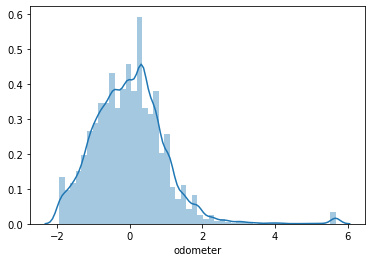

In [275]:
sns.distplot(df.odometer)
# giong phan phoi chuan

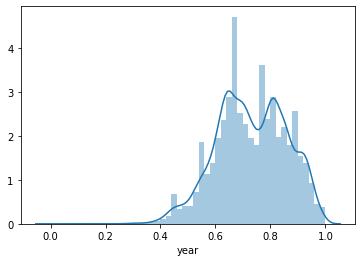

In [276]:
sns.distplot(df.year)

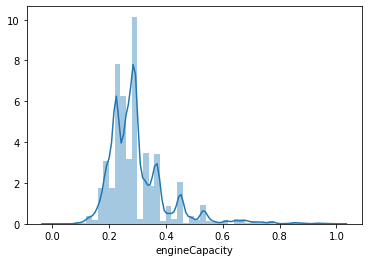

In [277]:
sns.distplot(df.engineCapacity)

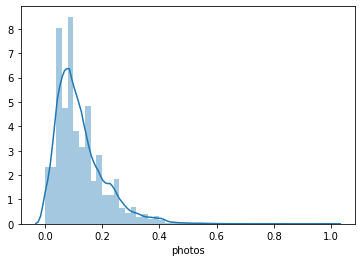

In [278]:
sns.distplot(df.photos)

In [279]:
# chọn Odometer dùng Gauss Rescaling
# Year, engineCapacity, photos dùng Min max Rescaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()

num_vars = ['year', 'engineCapacity', 'photos']
X_df[num_vars] = scaler.fit_transform(X_df[num_vars])

scaler = StandardScaler()
num_vars = ['odometer']
X_df[num_vars] = scaler.fit_transform(X_df[num_vars])

In [280]:
# gop X_df, Y_df
df = pd.concat([X_df, Y_df.price], axis=1)
df.head()

,id,manufacturer,model,transmission,color,odometer,year,engineType,engineCapacity,bodyType,...,feature_5,feature_6,feature_7,feature_8,feature_9,gasoline,hybrid-petrol,front,rear,price
21753,21754,BMW,518,1,green,1.823993,0.559322,1,0.258065,sedan,...,0,0,0,0,1,1,0,0,1,790.0
251,252,Renault,Laguna,1,blue,-0.591346,0.661017,0,0.274194,universal,...,0,0,0,0,1,0,0,1,0,2400.0
22941,22942,Citroen,C5,1,blue,0.502393,0.745763,0,0.290323,liftback,...,0,0,0,1,1,0,0,1,0,4600.0
618,619,Mercedes-Benz,E220,1,silver,1.413841,0.762712,0,0.322581,universal,...,1,1,1,1,1,0,0,0,1,8000.0
17090,17091,Chrysler,Voyager,1,black,-1.925327,0.728814,0,0.370968,minivan,...,0,0,0,0,1,0,0,1,0,5850.0


## Target encoding

In [281]:
# gop X_df, Y_df
X_df = pd.concat([X_df, Y_df.price], axis=1)

In [282]:
# Manufacturer
manufacturer_avg_price = X_df.groupby('manufacturer')['price'].mean()
X_df['manufacturer'] = X_df['manufacturer'].map(manufacturer_avg_price)

# Model
model_avg_price = X_df.groupby('model')['price'].mean()
X_df['model'] = X_df['model'].map(model_avg_price)

# Color
color_avg_price = X_df.groupby('color')['price'].mean()
X_df['color'] = X_df['color'].map(color_avg_price)

# BodyType
bodyType_avg_price = X_df.groupby('bodyType')['price'].mean()
X_df['bodyType'] = X_df['bodyType'].map(bodyType_avg_price)

X_df.head()

,id,manufacturer,model,transmission,color,odometer,year,engineType,engineCapacity,bodyType,...,feature_5,feature_6,feature_7,feature_8,feature_9,gasoline,hybrid-petrol,front,rear,price
21753,21754,9231.614218,1764.153529,1,3033.307765,1.823993,0.559322,1,0.258065,5784.530544,...,0,0,0,0,1,1,0,0,1,790.0
251,252,4582.509022,3034.137927,1,4629.305921,-0.591346,0.661017,0,0.274194,5093.914508,...,0,0,0,0,1,0,0,1,0,2400.0
22941,22942,4471.440451,5707.489709,1,4629.305921,0.502393,0.745763,0,0.290323,7677.077726,...,0,0,0,1,1,0,0,1,0,4600.0
618,619,9422.781053,6222.262840,1,5840.532513,1.413841,0.762712,0,0.322581,5093.914508,...,1,1,1,1,1,0,0,0,1,8000.0
17090,17091,5055.938616,3642.381053,1,9188.717469,-1.925327,0.728814,0,0.370968,6105.616011,...,0,0,0,0,1,0,0,1,0,5850.0
